In [136]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [137]:
df = pd.read_excel("Sales-2_updated.xlsx",sheet_name='Sales')
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [139]:
df['CustID'] = df['CustID'].astype(object)
df['ExistingProdType'] = df['ExistingProdType'].astype(object)
df['Complaint'] = df['Complaint'].astype(object)

In [140]:
df.select_dtypes(include=object).head()

,CustID,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,MaritalStatus,Complaint,Zone,PaymentMethod
0,7000000,Agent,Salaried,Graduate,Female,3,Manager,Single,1,North,Half Yearly
1,7000001,Third Party Partner,Salaried,Graduate,Male,4,Manager,Divorced,0,North,Yearly
2,7000002,Agent,Free Lancer,Post Graduate,Male,4,Exe,Unmarried,1,North,Yearly
3,7000003,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,Divorced,1,West,Half Yearly
4,7000004,Agent,Small Business,UG,Male,3,Executive,Divorced,0,West,Half Yearly


In [141]:
df.select_dtypes(include=np.number).head()

,AgentBonus,Age,CustTenure,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,2.0,20993.0,2.0,806761.0,5,2.0
1,2214,11.0,2.0,4.0,20130.0,3.0,294502.0,7,3.0
2,4273,26.0,4.0,3.0,17090.0,2.0,NaN,0,3.0
3,1791,11.0,NaN,3.0,17909.0,2.0,268635.0,0,5.0
4,2955,6.0,NaN,4.0,18468.0,4.0,366405.0,2,5.0


In [142]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AgentBonus,4520.0,4077.838274,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,14.494707,9.037629,2.0,7.00,13.0,20.00,58.0
CustTenure,4294.0,14.469027,8.963671,2.0,7.00,13.0,20.00,57.0
NumberOfPolicy,4475.0,3.565363,1.455926,1.0,2.00,4.0,5.00,6.0
MonthlyIncome,4284.0,22890.309991,4885.600757,16009.0,19683.50,21606.0,24725.00,38456.0
ExistingPolicyTenure,4336.0,4.130074,3.346386,1.0,2.00,3.0,6.00,25.0
SumAssured,4366.0,619999.699267,246234.822140,168536.0,439443.25,578976.5,758236.00,1838496.0
LastMonthCalls,4520.0,4.626991,3.620132,0.0,2.00,3.0,8.00,18.0
CustCareScore,4468.0,3.067592,1.382968,1.0,2.00,3.0,4.00,5.0


In [143]:
## We have CustID with 100% unique values, indicating this column is to uniquely identify each customer
# but doesn't hold any significance in analysis, as we also can't group.

# So, this is a redundant column, we can remove

df.select_dtypes(include=object).nunique()/df.shape[0]*100

CustID              100.000000
Channel               0.066372
Occupation            0.110619
EducationField        0.154867
Gender                0.066372
ExistingProdType      0.132743
Designation           0.132743
MaritalStatus         0.088496
Complaint             0.044248
Zone                  0.088496
PaymentMethod         0.088496
dtype: float64

In [144]:
df.drop(columns='CustID', inplace=True)

### Looking for duplicates

In [145]:
df.duplicated().sum()

0

### Data Cleaning

In [146]:
df['Gender'].value_counts()

Gender
Male       2688
Female     1507
Fe male     325
Name: count, dtype: int64

In [147]:
df['Gender'] = df['Gender'].str.replace('Fe male','Female')

In [148]:
df['Gender'].value_counts()

Gender
Male      2688
Female    1832
Name: count, dtype: int64

In [149]:
df['Channel'].value_counts()

Channel
Agent                  3194
Third Party Partner     858
Online                  468
Name: count, dtype: int64

In [150]:
df['Occupation'].value_counts()

Occupation
Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: count, dtype: int64

In [151]:
df['Occupation'] = df['Occupation'].str.replace('Laarge Business','Large Business')

In [152]:
df['Occupation'].value_counts()

Occupation
Salaried          2192
Small Business    1918
Large Business     408
Free Lancer          2
Name: count, dtype: int64

In [153]:
df['Zone'].value_counts()

Zone
West     2566
North    1884
East       64
South       6
Name: count, dtype: int64

In [154]:
df['PaymentMethod'].value_counts()

PaymentMethod
Half Yearly    2656
Yearly         1434
Monthly         354
Quarterly        76
Name: count, dtype: int64

In [155]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2268
Single       1254
Divorced      804
Unmarried     194
Name: count, dtype: int64

In [156]:
df['MaritalStatus'] = df['MaritalStatus'].str.replace('Unmarried','Single')

In [157]:
df['EducationField'].value_counts()

EducationField
Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: count, dtype: int64

In [158]:
df['EducationField'] = df['EducationField'].str.replace('UG','Under Graduate')

In [159]:
df['EducationField'].value_counts()

EducationField
Graduate          1870
Under Graduate    1420
Diploma            496
Engineer           408
Post Graduate      252
MBA                 74
Name: count, dtype: int64

In [160]:
df['Designation'].value_counts()

Designation
Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: count, dtype: int64

In [161]:
df['Designation'] = df['Designation'].str.replace('Exe','Executive')
df['Designation'] = df['Designation'].str.replace('Executivecutive','Executive')

In [162]:
df['Designation'].value_counts()

Designation
Executive         1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: count, dtype: int64

In [163]:
df['CustCareScore'].value_counts()

CustCareScore
3.0    1367
1.0     928
5.0     893
4.0     826
2.0     454
Name: count, dtype: int64

In [164]:
df['Complaint'].value_counts()

Complaint
0    3222
1    1298
Name: count, dtype: int64

### Outliers

In [165]:
df.select_dtypes(np.number).columns

Index(['AgentBonus', 'Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome',
       'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls',
       'CustCareScore'],
      dtype='object')

In [166]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

vars = ['AgentBonus', 'Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=df[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.3)

In [167]:
vars = ['ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=df[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.3)

### Outlier Treatment

In [168]:
quantile_result = df['SumAssured'].quantile([0.25,0.75])
quantile_result[0.25]

439443.25

In [169]:
def x(col):
    quantile_result = df[col].quantile([0.25,0.75])
    return (quantile_result[0.25], quantile_result[0.75])
x('SumAssured')

(439443.25, 758236.0)

In [170]:
num_cols = df.select_dtypes(np.number).columns

def get_outlier_range(col):
    Q1,Q3=df[col].quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [171]:
print(get_outlier_range('Age'))

(-12.5, 39.5)


In [172]:
outliers_df = pd.DataFrame(columns=['Column', 'Count of Outliers'])

for column in num_cols:
    
    lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]
    
    counter = 0
    
    for element in df[column]:
        if (element < lower_range) or (element > upper_range):
            counter+=1
    outliers_df.loc[len(outliers_df)] = {'Column':column, 'Count of Outliers':counter}
outliers_df

,Column,Count of Outliers
0,AgentBonus,100
1,Age,50
2,CustTenure,52
3,NumberOfPolicy,0
4,MonthlyIncome,377
5,ExistingPolicyTenure,131
6,SumAssured,96
7,LastMonthCalls,12
8,CustCareScore,0


In [173]:
round(outliers_df['Count of Outliers'].sum()/df.shape[0]*100, 2)

18.1

In [174]:
column = 'Age'

lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]

age_outlier_list = []

for element in df[column]:
    if (element < lower_range) or (element > upper_range):
        age_outlier_list.append(element)
np.array(sorted(np.unique(age_outlier_list)))

array([40., 41., 42., 43., 44., 46., 47., 48., 50., 51., 52., 53., 54.,
       57., 58.])

In [175]:
column = 'AgentBonus'

lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]

age_outlier_list = []

for element in df[column]:
    if (element < lower_range) or (element > upper_range):
        age_outlier_list.append(element)
np.array(sorted(np.unique(age_outlier_list)))

array([7627, 7639, 7660, 7669, 7673, 7684, 7687, 7692, 7696, 7701, 7734,
       7756, 7775, 7776, 7792, 7796, 7808, 7820, 7822, 7825, 7833, 7841,
       7856, 7870, 7888, 7896, 7902, 7906, 7907, 7908, 7935, 7950, 7958,
       7972, 7985, 7990, 7994, 8002, 8030, 8048, 8053, 8065, 8067, 8080,
       8144, 8177, 8179, 8207, 8215, 8239, 8256, 8261, 8265, 8285, 8291,
       8318, 8325, 8353, 8380, 8427, 8428, 8521, 8549, 8551, 8579, 8583,
       8650, 8679, 8708, 8743, 8756, 8759, 8763, 8764, 8771, 8785, 8813,
       8822, 8895, 8909, 9009, 9047, 9140, 9181, 9192, 9312, 9426, 9490,
       9494, 9521, 9540, 9600, 9608])

In [176]:
column = 'CustTenure'

lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]

age_outlier_list = []

for element in df[column]:
    if (element < lower_range) or (element > upper_range):
        age_outlier_list.append(element)
np.array(sorted(np.unique(age_outlier_list)))

array([40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 55., 57.])

In [177]:
column = 'MonthlyIncome'

lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]

age_outlier_list = []

for element in df[column]:
    if (element < lower_range) or (element > upper_range):
        age_outlier_list.append(element)
np.array(sorted(np.unique(age_outlier_list)))

array([32328., 32329., 32399., 32421., 32423., 32426., 32430., 32444.,
       32465., 32483., 32567., 32575., 32584., 32603., 32639., 32650.,
       32665., 32732., 32779., 32793., 32856., 32861., 32868., 32875.,
       32924., 33041., 33061., 33172., 33189., 33200., 33213., 33265.,
       33271., 33300., 33303., 33309., 33430., 33606., 33659., 33665.,
       33711., 33722., 33740., 33789., 33824., 33836., 33844., 33859.,
       33880., 33884., 33947., 34033., 34038., 34045., 34049., 34068.,
       34081., 34094., 34141., 34144., 34161., 34187., 34189., 34190.,
       34197., 34202., 34232., 34237., 34244., 34246., 34272., 34328.,
       34331., 34392., 34406., 34419., 34429., 34431., 34436., 34449.,
       34472., 34489., 34502., 34513., 34517., 34521., 34537., 34545.,
       34566., 34581., 34586., 34613., 34626., 34627., 34636., 34641.,
       34658., 34665., 34701., 34717., 34740., 34764., 34785., 34833.,
       34845., 34847., 34859., 34870., 34879., 34894., 34926., 34943.,
      

In [178]:
column = 'ExistingPolicyTenure'

lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]

age_outlier_list = []

for element in df[column]:
    if (element < lower_range) or (element > upper_range):
        age_outlier_list.append(element)
np.array(sorted(np.unique(age_outlier_list)))

array([13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 25.])

In [179]:
column = 'SumAssured'

lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]

age_outlier_list = []

for element in df[column]:
    if (element < lower_range) or (element > upper_range):
        age_outlier_list.append(element)
np.array(sorted(np.unique(age_outlier_list)))

array([1238181., 1246160., 1246180., 1249118., 1250285., 1253316.,
       1255705., 1256275., 1258852., 1261067., 1264813., 1266476.,
       1267402., 1268380., 1269035., 1270322., 1273205., 1275190.,
       1277902., 1280260., 1282691., 1287031., 1288063., 1293723.,
       1298565., 1303243., 1303569., 1304984., 1306123., 1306897.,
       1317036., 1319563., 1321861., 1322503., 1324341., 1325334.,
       1333055., 1333822., 1333891., 1339283., 1345137., 1346857.,
       1356451., 1356996., 1361250., 1362864., 1363322., 1364451.,
       1365029., 1368118., 1370717., 1371954., 1372096., 1385080.,
       1385532., 1385721., 1389565., 1392767., 1397544., 1400708.,
       1401707., 1407505., 1409233., 1410768., 1416407., 1423463.,
       1427769., 1444065., 1452930., 1454216., 1464342., 1464775.,
       1464838., 1488196., 1488537., 1492946., 1493292., 1524762.,
       1533645., 1533851., 1538784., 1539169., 1542873., 1544261.,
       1558820., 1559383., 1573268., 1604453., 1612720., 16428

In [180]:
column = 'LastMonthCalls'

lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]

age_outlier_list = []

for element in df[column]:
    if (element < lower_range) or (element > upper_range):
        age_outlier_list.append(element)
np.array(sorted(np.unique(age_outlier_list)))

array([18])

In [181]:
## All values are making sense, so we're not removing any outliers

### EDA

In [182]:
df.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [183]:
df.select_dtypes('object').head()

,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,MaritalStatus,Complaint,Zone,PaymentMethod
0,Agent,Salaried,Graduate,Female,3,Manager,Single,1,North,Half Yearly
1,Third Party Partner,Salaried,Graduate,Male,4,Manager,Divorced,0,North,Yearly
2,Agent,Free Lancer,Post Graduate,Male,4,Executive,Single,1,North,Yearly
3,Third Party Partner,Salaried,Graduate,Female,3,Executive,Divorced,1,West,Half Yearly
4,Agent,Small Business,Under Graduate,Male,3,Executive,Divorced,0,West,Half Yearly


In [184]:
df.select_dtypes(np.number).head()

,AgentBonus,Age,CustTenure,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,2.0,20993.0,2.0,806761.0,5,2.0
1,2214,11.0,2.0,4.0,20130.0,3.0,294502.0,7,3.0
2,4273,26.0,4.0,3.0,17090.0,2.0,NaN,0,3.0
3,1791,11.0,NaN,3.0,17909.0,2.0,268635.0,0,5.0
4,2955,6.0,NaN,4.0,18468.0,4.0,366405.0,2,5.0


In [185]:
import plotly.express as px

fig = px.scatter(x=df['AgentBonus'], y=df['SumAssured']
           , title='Scatter Plot for AgentBonus Vs SumAssured')

fig.update_layout(
    margin=dict(l=100, r=30, t=30, b=30)
)
fig.update_layout(title_x=0.5)

### Notes: With agents making big sum assured as insurance, they're making good bonus.

In [186]:
fig = px.scatter(x=df['AgentBonus'], y=df['Age']
           , title='Scatter Plot for AgentBonus Vs Age')

fig.update_layout(
    margin=dict(l=100, r=30, t=30, b=30)
)
fig.update_layout(title_x=0.5)

### Notes: With agents making big sum assured as insurance, they're making good bonus.

<Axes: xlabel='MaritalStatus', ylabel='AgentBonus'>

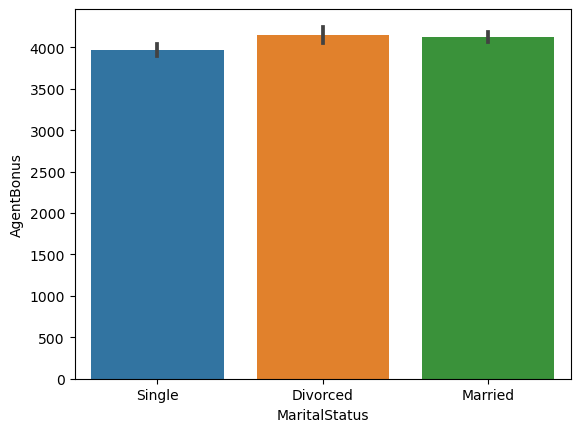

In [187]:
sns.barplot(x=df['MaritalStatus'], y=df['AgentBonus'])

In [188]:
# df.groupby(by='MaritalStatus').mean()['AgentBonus']
df[['MaritalStatus', 'AgentBonus']].groupby('MaritalStatus').agg('sum')

,AgentBonus
MaritalStatus,
Divorced,3333274
Married,9349364
Single,5749191


<Axes: xlabel='AgentBonus', ylabel='SumAssured'>

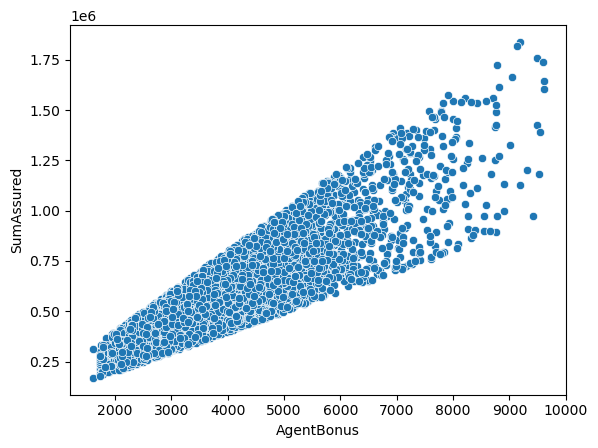

In [189]:
sns.scatterplot(x=df['AgentBonus'], y=df['SumAssured'])

In [190]:
df.select_dtypes(object).isnull().sum()

Channel             0
Occupation          0
EducationField      0
Gender              0
ExistingProdType    0
Designation         0
MaritalStatus       0
Complaint           0
Zone                0
PaymentMethod       0
dtype: int64

In [191]:
df.select_dtypes(np.number).isnull().sum()

AgentBonus                0
Age                     269
CustTenure              226
NumberOfPolicy           45
MonthlyIncome           236
ExistingPolicyTenure    184
SumAssured              154
LastMonthCalls            0
CustCareScore            52
dtype: int64

## Dummy Encoding

In [192]:
cat_cols_df = df.select_dtypes(object)
numerical_df = df.select_dtypes(np.number)

In [193]:
dummy_encoded = pd.get_dummies(cat_cols_df, drop_first=True, dtype=int)
dummy_encoded.head()

,Channel_Online,Channel_Third Party Partner,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,EducationField_Engineer,EducationField_Graduate,EducationField_MBA,EducationField_Post Graduate,EducationField_Under Graduate,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Complaint_1,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,0,1
3,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [194]:
dummy_encoded.shape

(4520, 29)

In [195]:
encoded_df = pd.concat([numerical_df, dummy_encoded], axis=1)
encoded_df.head()

,AgentBonus,Age,CustTenure,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Complaint_1,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,4409,22.0,4.0,2.0,20993.0,2.0,806761.0,5,2.0,0,...,0,0,1,1,1,0,0,0,0,0
1,2214,11.0,2.0,4.0,20130.0,3.0,294502.0,7,3.0,0,...,0,0,0,0,1,0,0,0,0,1
2,4273,26.0,4.0,3.0,17090.0,2.0,NaN,0,3.0,0,...,0,0,1,1,1,0,0,0,0,1
3,1791,11.0,NaN,3.0,17909.0,2.0,268635.0,0,5.0,0,...,0,0,0,1,0,0,1,0,0,0
4,2955,6.0,NaN,4.0,18468.0,4.0,366405.0,2,5.0,0,...,0,0,0,0,0,0,1,0,0,0


In [196]:
encoded_df.shape

(4520, 38)

## Null value imputer using KNN Imputer

In [197]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
df_imputed = pd.DataFrame(imputer.fit_transform(encoded_df), columns = encoded_df.columns)
df_imputed.head()

,AgentBonus,Age,CustTenure,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Complaint_1,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,4409.0,22.0,4.0,2.0,20993.0,2.0,806761.0,5.0,2.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2214.0,11.0,2.0,4.0,20130.0,3.0,294502.0,7.0,3.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4273.0,26.0,4.0,3.0,17090.0,2.0,708009.3,0.0,3.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1791.0,11.0,5.9,3.0,17909.0,2.0,268635.0,0.0,5.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2955.0,6.0,9.3,4.0,18468.0,4.0,366405.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [198]:
df_imputed.isnull().sum()

AgentBonus                       0
Age                              0
CustTenure                       0
NumberOfPolicy                   0
MonthlyIncome                    0
ExistingPolicyTenure             0
SumAssured                       0
LastMonthCalls                   0
CustCareScore                    0
Channel_Online                   0
Channel_Third Party Partner      0
Occupation_Large Business        0
Occupation_Salaried              0
Occupation_Small Business        0
EducationField_Engineer          0
EducationField_Graduate          0
EducationField_MBA               0
EducationField_Post Graduate     0
EducationField_Under Graduate    0
Gender_Male                      0
ExistingProdType_2               0
ExistingProdType_3               0
ExistingProdType_4               0
ExistingProdType_5               0
ExistingProdType_6               0
Designation_Executive            0
Designation_Manager              0
Designation_Senior Manager       0
Designation_VP      

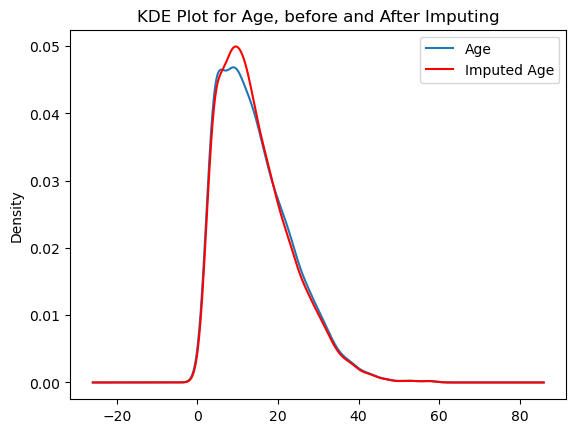

In [199]:
# To check if our imputation didn't change the variation too much

fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde', ax=ax)
df_imputed['Age'].plot(kind='kde', ax=ax, color='red', label='Imputed Age')
plt.title('KDE Plot for Age, before and After Imputing')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

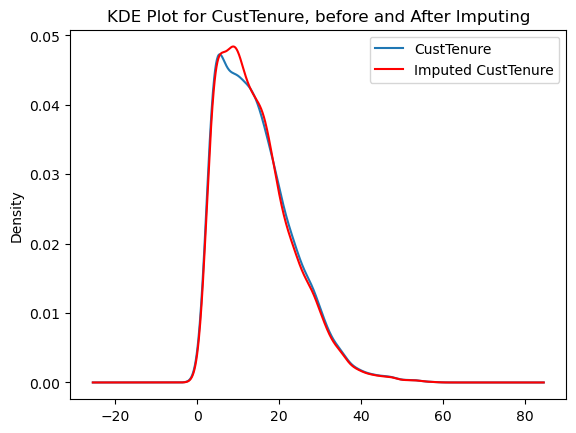

In [200]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['CustTenure'].plot(kind='kde', ax=ax)
df_imputed['CustTenure'].plot(kind='kde', ax=ax, color='red', label='Imputed CustTenure')
plt.title('KDE Plot for CustTenure, before and After Imputing')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

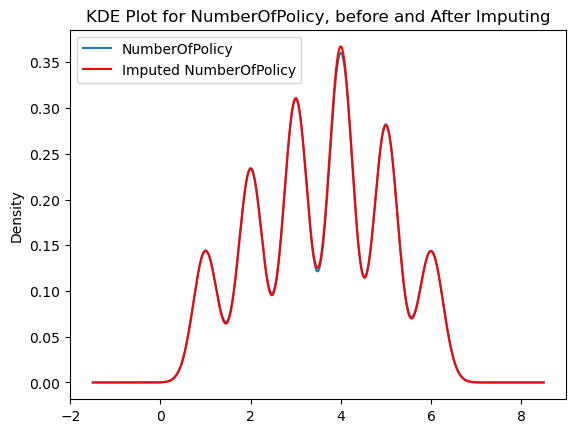

In [201]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['NumberOfPolicy'].plot(kind='kde', ax=ax)
df_imputed['NumberOfPolicy'].plot(kind='kde', ax=ax, color='red', label='Imputed NumberOfPolicy')
plt.title('KDE Plot for NumberOfPolicy, before and After Imputing')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

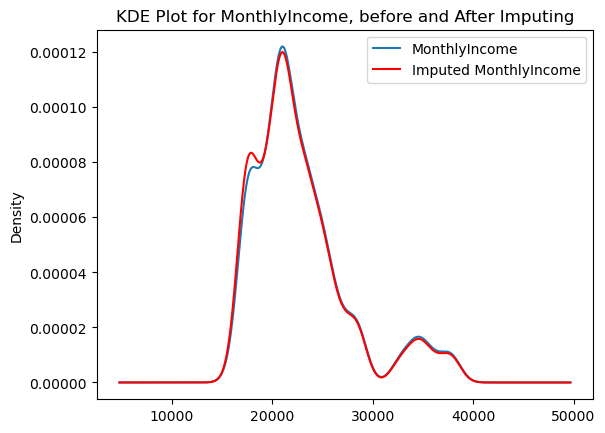

In [202]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['MonthlyIncome'].plot(kind='kde', ax=ax)
df_imputed['MonthlyIncome'].plot(kind='kde', ax=ax, color='red', label='Imputed MonthlyIncome')
plt.title('KDE Plot for MonthlyIncome, before and After Imputing')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

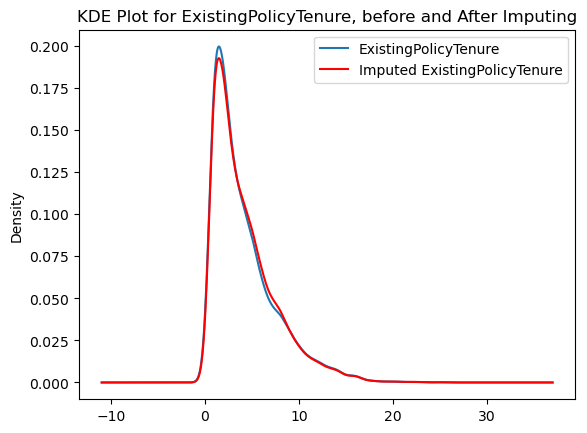

In [203]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['ExistingPolicyTenure'].plot(kind='kde', ax=ax)
df_imputed['ExistingPolicyTenure'].plot(kind='kde', ax=ax, color='red', label='Imputed ExistingPolicyTenure')
plt.title('KDE Plot for ExistingPolicyTenure, before and After Imputing')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

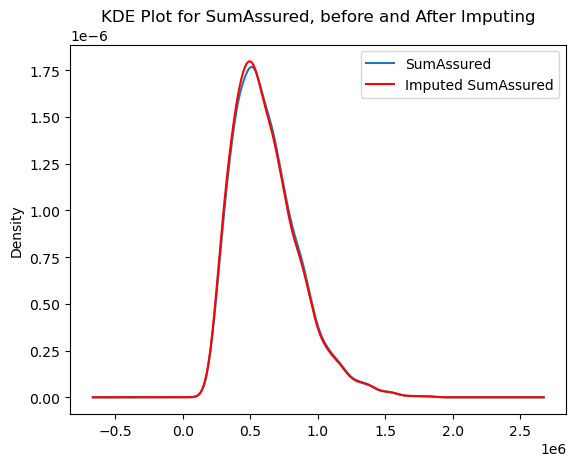

In [204]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['SumAssured'].plot(kind='kde', ax=ax)
df_imputed['SumAssured'].plot(kind='kde', ax=ax, color='red', label='Imputed SumAssured')
plt.title('KDE Plot for SumAssured, before and After Imputing')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

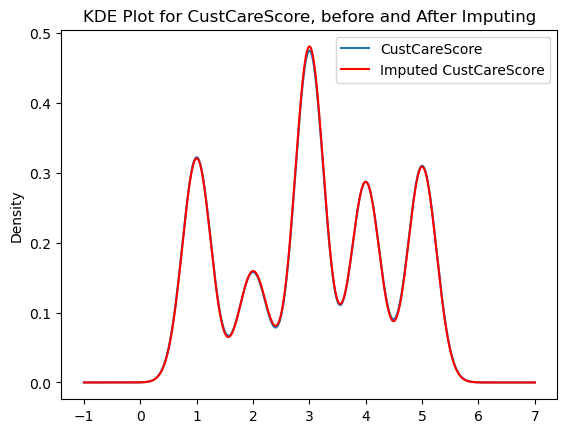

In [205]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['CustCareScore'].plot(kind='kde', ax=ax)
df_imputed['CustCareScore'].plot(kind='kde', ax=ax, color='red', label='Imputed CustCareScore')
plt.title('KDE Plot for CustCareScore, before and After Imputing')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [206]:
## From all of these above graphs, we can observe, our imputation didn't change the variance of our columns, so, we can safely replace imputed columns with original columns

### Feature Engineering

In [207]:
import plotly.express as px

z = df.select_dtypes(np.number).corr()

fig = px.imshow(z, text_auto=True)
fig.update_layout(
    margin=dict(l=100, r=30, t=30, b=30)
)
fig.show()

In [208]:
df_imputed.shape

(4520, 38)

In [209]:
#To check the level of multicollinearity in the data

from statsmodels.stats.outliers_influence import variance_inflation_factor
# consider the independent variables
X = df_imputed.drop('AgentBonus',axis=1)

# create an empty dataframe
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names
vif["Features"] = X.columns

# print the VIF
vif.sort_values('VIF_Factor', ascending=False)

,VIF_Factor,Features
11,163.930260,Occupation_Salaried
12,133.315287,Occupation_Small Business
3,84.141462,MonthlyIncome
21,64.456405,ExistingProdType_4
10,49.213455,Occupation_Large Business
20,44.020437,ExistingProdType_3
33,40.595800,Zone_West
14,31.929130,EducationField_Graduate
31,30.061888,Zone_North
22,26.056943,ExistingProdType_5


In [210]:
#To check the level of multicollinearity in the data

from statsmodels.stats.outliers_influence import variance_inflation_factor
# consider the independent variables
X = df_imputed.drop(['AgentBonus','Occupation_Salaried'],axis=1)

# create an empty dataframe
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names
vif["Features"] = X.columns

# print the VIF
vif.sort_values('VIF_Factor', ascending=False)

,VIF_Factor,Features
3,67.481091,MonthlyIncome
20,52.649432,ExistingProdType_4
32,34.270172,Zone_West
19,33.591525,ExistingProdType_3
13,28.381879,EducationField_Graduate
11,26.666373,Occupation_Small Business
30,25.452205,Zone_North
21,22.564173,ExistingProdType_5
12,19.975434,EducationField_Engineer
10,18.550362,Occupation_Large Business


In [211]:
#To check the level of multicollinearity in the data

from statsmodels.stats.outliers_influence import variance_inflation_factor
# consider the independent variables
X = df_imputed.drop(['AgentBonus','Occupation_Salaried', 'ExistingProdType_4'],axis=1)

# create an empty dataframe
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names
vif["Features"] = X.columns

# print the VIF
vif.sort_values('VIF_Factor', ascending=False)

,VIF_Factor,Features
3,53.331775,MonthlyIncome
31,32.288471,Zone_West
13,24.718130,EducationField_Graduate
29,24.075802,Zone_North
11,23.446419,Occupation_Small Business
12,19.948540,EducationField_Engineer
10,18.012373,Occupation_Large Business
5,13.326078,SumAssured
22,7.745906,Designation_Executive
2,7.660877,NumberOfPolicy


In [212]:
#To check the level of multicollinearity in the data

from statsmodels.stats.outliers_influence import variance_inflation_factor
# consider the independent variables
X = df_imputed.drop(['AgentBonus','Occupation_Salaried', 'ExistingProdType_4', 'MonthlyIncome'],axis=1)

# create an empty dataframe
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names
vif["Features"] = X.columns

# print the VIF
vif.sort_values('VIF_Factor', ascending=False)

,VIF_Factor,Features
30,27.843125,Zone_West
28,20.809656,Zone_North
12,20.199381,EducationField_Graduate
10,19.580088,Occupation_Small Business
11,19.531056,EducationField_Engineer
9,17.894598,Occupation_Large Business
4,12.980141,SumAssured
2,7.405049,NumberOfPolicy
21,6.732719,Designation_Executive
6,5.919879,CustCareScore


In [213]:
#To check the level of multicollinearity in the data

from statsmodels.stats.outliers_influence import variance_inflation_factor
# consider the independent variables
X = df_imputed.drop(['AgentBonus','Occupation_Salaried', 'ExistingProdType_4', 'MonthlyIncome', 'Zone_West'],axis=1)

# create an empty dataframe
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names
vif["Features"] = X.columns

# print the VIF
vif.sort_values('VIF_Factor', ascending=False)

,VIF_Factor,Features
11,18.956921,EducationField_Engineer
9,17.787743,Occupation_Large Business
10,14.920354,Occupation_Small Business
12,14.763685,EducationField_Graduate
4,12.698286,SumAssured
2,7.220975,NumberOfPolicy
21,6.215802,Designation_Executive
6,5.802660,CustCareScore
22,5.446209,Designation_Manager
0,4.940793,Age


In [214]:
#To check the level of multicollinearity in the data

from statsmodels.stats.outliers_influence import variance_inflation_factor
# consider the independent variables
X = df_imputed.drop(['AgentBonus','Occupation_Salaried', 'ExistingProdType_4', 'MonthlyIncome'\
                     , 'Zone_West', 'EducationField_Engineer'],axis=1)

# create an empty dataframe
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names
vif["Features"] = X.columns

# print the VIF
vif.sort_values('VIF_Factor', ascending=False)

,VIF_Factor,Features
10,14.271328,Occupation_Small Business
11,13.593406,EducationField_Graduate
4,12.633058,SumAssured
2,7.140725,NumberOfPolicy
20,6.061645,Designation_Executive
6,5.770810,CustCareScore
21,5.354646,Designation_Manager
0,4.939119,Age
1,4.930081,CustTenure
9,3.803770,Occupation_Large Business


### We removed five highly correlated columns out of 38 columns, we're able to drop multi-collinearity from 163 to < 15

In [215]:
df_imputed.drop(['Occupation_Salaried', 'ExistingProdType_4', 'MonthlyIncome'\
                 , 'Zone_West', 'EducationField_Engineer'], axis=1, inplace=True)

In [216]:
df_imputed.shape

(4520, 33)

In [217]:
## Feature Importance 


X = df_imputed.drop('AgentBonus', axis=1)  #independent columns
y = df_imputed['AgentBonus']    #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

ExtraTreesClassifier()

In [218]:
important_fetures= pd.Series(model.feature_importances_, index= X.columns,)

In [219]:
top_cols_FE = important_fetures.sort_values(ascending=False).head(25)
top_cols_FE

SumAssured                       0.104975
Age                              0.099199
CustTenure                       0.098777
ExistingPolicyTenure             0.089076
LastMonthCalls                   0.084454
NumberOfPolicy                   0.077765
CustCareScore                    0.071163
Zone_North                       0.035040
MaritalStatus_Married            0.031722
Gender_Male                      0.030460
Complaint_1                      0.026834
ExistingProdType_3               0.025569
PaymentMethod_Yearly             0.020839
MaritalStatus_Single             0.019784
ExistingProdType_5               0.017796
EducationField_Under Graduate    0.016538
Occupation_Small Business        0.016060
Channel_Third Party Partner      0.016050
Channel_Online                   0.015759
EducationField_Graduate          0.014408
Designation_Manager              0.013385
PaymentMethod_Monthly            0.011978
Designation_Executive            0.011945
Occupation_Large Business        0

<Axes: >

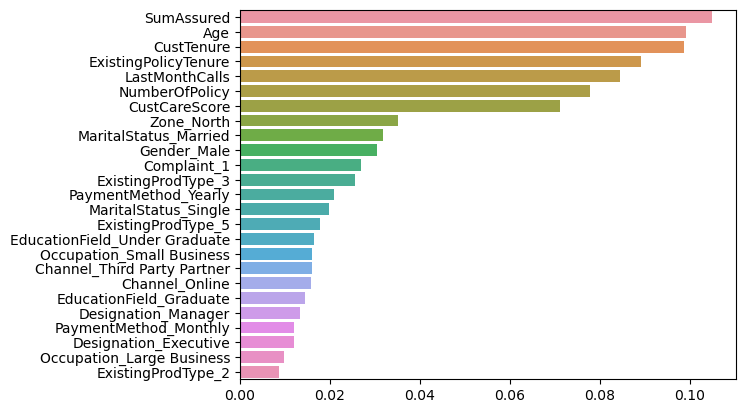

In [220]:
sns.barplot(x=top_cols_FE.values, y=top_cols_FE.index)

In [221]:
list(top_cols_FE.index)

['SumAssured',
 'Age',
 'CustTenure',
 'ExistingPolicyTenure',
 'LastMonthCalls',
 'NumberOfPolicy',
 'CustCareScore',
 'Zone_North',
 'MaritalStatus_Married',
 'Gender_Male',
 'Complaint_1',
 'ExistingProdType_3',
 'PaymentMethod_Yearly',
 'MaritalStatus_Single',
 'ExistingProdType_5',
 'EducationField_Under Graduate',
 'Occupation_Small Business',
 'Channel_Third Party Partner',
 'Channel_Online',
 'EducationField_Graduate',
 'Designation_Manager',
 'PaymentMethod_Monthly',
 'Designation_Executive',
 'Occupation_Large Business',
 'ExistingProdType_2']

## Model Building 

### Without Feature importance

In [222]:
# type your code here

from sklearn.model_selection import train_test_split

x = df_imputed.drop(columns = 'AgentBonus', axis=1)
y = df_imputed['AgentBonus']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=10)

In [223]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

In [224]:
# mean and std of train. Which helps us to understand
# whether the train and test are some same population

In [225]:
import statsmodels.api as sm

x_train_scaled_cons = sm.add_constant(x_train_scaled)
lr_ols = sm.OLS(y_train,x_train_scaled_cons.values).fit()
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     501.0
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:42:53   Log-Likelihood:                -28258.
No. Observations:                3616   AIC:                         5.658e+04
Df Residuals:                    3583   BIC:                         5.679e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4099.1059     10.011    409.450      0.000    4079.478    4118.734
x1           206.6461     11.790     17.527      0.000     183.531     229.762
x2           206.8361     11.759     17.589      0.000     183.781     229.891
x3            -2.1003     10.523     -0.200      0.842     -22.732      18.532
x4           113.8105     10.833     10.506      0.000      92.571     135.050
x5           839.4059     13.643     61.526      0.000     812.657     866.155
x6            -3.5878     11.021     -0.326      0.745     -25.196      18.021
x7            11.5451     10.118      1.141      0.254      -8.293      31.383
x8            -1.4997     10.239     -0.146      0.884     -21.574      18.574
x9             0.5557     10.202      0.054      0.957     -19.446      20.558
x10          -13.8603     24.097     -0.575      0.565     -61.105      33.384
x11          -25.3455     38.325     -0.661      0.508    -100.486      49.795
x12          -25.0580     39.308     -0.637      0.524    -102.126      52.010
x13          -13.8172     14.380     -0.961      0.337     -42.011      14.376
x14          -17.0065     20.917     -0.813      0.416     -58.016      24.003
x15           -4.1338     16.222     -0.255      0.799     -35.940      27.672
x16            3.1263     10.153      0.308      0.758     -16.780      23.033
x17           21.7676     13.595      1.601      0.109      -4.887      48.422
x18          -61.0990     12.251     -4.987      0.000     -85.120     -37.078
x19           52.2564     13.562      3.853      0.000      25.667      78.846
x20           14.2991     10.871      1.315      0.188      -7.015      35.613
x21         -319.7145     21.296    -15.013      0.000    -361.467    -277.962
x22         -278.1476     20.076    -13.855      0.000    -317.510    -238.785
x23         -115.3997     16.020     -7.203      0.000    -146.810     -83.990
x24           35.2009     12.720      2.767      0.006      10.262      60.140
x25          -14.8265     13.920     -1.065      0.287     -42.119      12.466
x26           14.6633     13.972      1.049      0.294     -12.730      42.057
x27           18.7438     10.063      1.863      0.063      -0.986      38.473
x28           -2.7823     10.107     -0.275      0.783     -22.599      17.034
x29            0.3425     10.034      0.034      0.973     -19.330      20.015
x30          -10.0163     13.624     -0.735      0.462     -36.728      16.695
x31            8.1464     10.841      0.751      0.452     -13.109      29.402
x32          -62.1521     15.265     -4.072      0.000     -92.080     -32.224
==============================================================================
Omnibus:                      251.044   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.810
Sk

### With Feature importance

In [226]:
# type your code here

from sklearn.model_selection import train_test_split

x = df_imputed[list(top_cols_FE.index)]
y = df_imputed['AgentBonus']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=10)

In [227]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

In [228]:
# mean and std of train. Which helps us to understand
# whether the train and test are some same population

In [229]:
import statsmodels.api as sm

x_train_cons = sm.add_constant(x_train)
lr_ols = sm.OLS(y_train,x_train_cons).fit()
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     619.9
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:42:53   Log-Likelihood:                -28310.
No. Observations:                3616   AIC:                         5.667e+04
Df Residuals:                    3590   BIC:                         5.683e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1420.1614     76.612     18.537      0.000    1269.954    1570.368
SumAssured                        0.0035    5.6e-05     62.425      0.000       0.003       0.004
Age                              24.2794      1.342     18.097      0.000      21.649      26.910
CustTenure                       24.2619      1.338     18.138      0.000      21.639      26.884
ExistingPolicyTenure             34.8750      3.293     10.590      0.000      28.419      41.331
LastMonthCalls                    1.5219      3.049      0.499      0.618      -4.456       7.500
NumberOfPolicy                   -1.6803      7.352     -0.229      0.819     -16.094      12.734
CustCareScore                    10.4999      7.462      1.407      0.159      -4.130      25.130
Zone_North                      -12.9508     20.738     -0.625      0.532     -53.609      27.708
MaritalStatus_Married           -35.8225     28.108     -1.274      0.203     -90.932      19.287
Gender_Male                      11.9294     20.816      0.573      0.567     -28.883      52.741
Complaint_1                      39.6262     22.449      1.765      0.078      -4.387      83.639
ExistingProdType_3             -120.5818     26.960     -4.473      0.000    -173.441     -67.723
PaymentMethod_Yearly           -116.8253     31.350     -3.727      0.000    -178.290     -55.360
MaritalStatus_Single             24.6388     30.212      0.816      0.415     -34.596      83.874
ExistingProdType_5              120.5375     35.928      3.355      0.001      50.096     190.979
EducationField_Under Graduate     4.1390     34.385      0.120      0.904     -63.277      71.555
Occupation_Small Business        10.1437     42.493      0.239      0.811     -73.170      93.457
Channel_Third Party Partner      -5.2590     26.127     -0.201      0.840     -56.483      45.966
Channel_Online                   -8.4755     34.954     -0.242      0.808     -77.007      60.057
EducationField_Graduate          19.3023     36.958      0.522      0.602     -53.159      91.763
Designation_Manager            -407.5670     27.831    -14.645      0.000    -462.132    -353.002
PaymentMethod_Monthly           -40.2340     48.842     -0.824      0.410    -135.995      55.527
Designation_Executive          -477.7942     30.605    -15.611      0.000    -537.800    -417.788
Occupation_Large Business         4.0290     47.561      0.085      0.932     -89.220      97.278
ExistingProdType_2              116.3551     59.308      1.962      0.050       0.074     232.637
==============================================================================
Omnibus:                      311.779   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.225
Skew

## Model

In [230]:
x = df_imputed.drop(columns = 'AgentBonus', axis=1)
y = df_imputed['AgentBonus']

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=0)

In [233]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (3164, 32)
X_test (1356, 32)
y_train (3164,)
y_test (1356,)


In [234]:
## Linear Regression

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression


LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [112]:
pd.DataFrame({'Column':X_train.columns, 'Coef':LR.coef_})

,Column,Coef
0,Age,22.864606
1,CustTenure,24.041592
2,NumberOfPolicy,7.043064
3,ExistingPolicyTenure,29.846800
4,SumAssured,0.003496
5,LastMonthCalls,-6.556399
6,CustCareScore,11.279292
7,Channel_Online,20.537150
8,Channel_Third Party Partner,-8.510673
9,Occupation_Large Business,-17.827991


In [116]:
intercept = LR.intercept_
intercept

1626.368839352515

In [119]:
print('R2 Train :', LR.score(X_train, y_train))
print('R2 Train :', LR.score(X_test, y_test))

R2 Train : 0.8233114510433932
R2 Train : 0.8050812622091933


In [122]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [123]:
from sklearn.metrics import mean_squared_error

print('RMSE Train :', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE Test :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE Train : 587.6658143850805
RMSE Test : 624.029269571512


In [125]:
y_test

3145    3403.0
72      1759.0
1065    2486.0
2708    3985.0
130     7696.0
         ...  
3354    4552.0
200     4067.0
1856    4429.0
4454    6441.0
3058    4845.0
Name: AgentBonus, Length: 1356, dtype: float64

<Axes: xlabel='AgentBonus'>

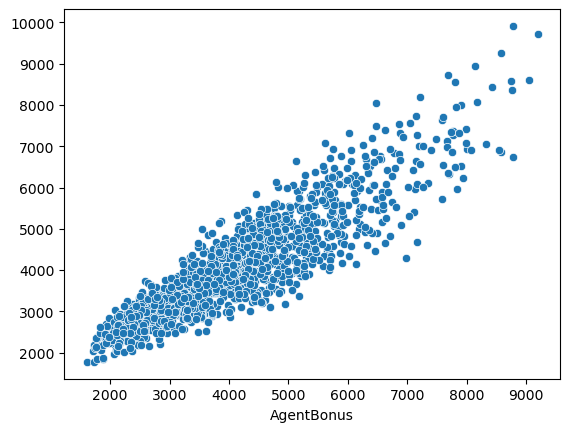

In [128]:
y_pred = LR.predict(X_test)

sns.scatterplot(x=y_test, y=y_pred)

In [100]:
## Stats model Linear Regression

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,...,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,Bonus_ratio,AgentBonus
3086,17.0,4.0,2.0,3.0,32484.375,0,1.0,560894.0,1.0,5.0,...,0,0,0,0,1,1,0,0,0.007693,4315.0
565,23.0,14.0,5.0,2.0,32484.375,0,1.0,688537.0,9.0,3.0,...,0,0,0,0,1,0,0,1,0.006579,4530.0
3479,24.0,18.0,4.0,6.0,17342.000,0,2.0,833744.0,11.0,1.0,...,1,0,1,0,0,0,0,0,0.007247,6042.0
1475,12.0,24.0,3.0,4.0,28734.000,0,5.0,736165.0,0.0,5.0,...,1,0,1,0,0,0,0,0,0.008197,6034.0
1621,11.0,13.0,5.0,1.0,22457.000,1,1.0,388506.0,2.0,3.0,...,0,0,0,0,1,0,0,1,0.005781,2246.0


In [130]:
y_pred = LR.predict(X_test)

In [135]:
LR.coef_[0]

x = pd.DataFrame(LR.coef_[0],index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Linear regression')
plt.show()

ValueError: DataFrame constructor not properly called!

In [114]:
intercept = regression_model.intercept_[0]

In [115]:
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.6222473363113773e-16


In [116]:
regression_model.score(X_train_scaled, y_train_scaled)

0.964769975892411

In [117]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9600200079478747

In [118]:
mse = np.mean((regression_model.predict(X_train_scaled)-y_train_scaled)**2)

In [119]:
import math

math.sqrt(mse)

0.18769662785353647

In [120]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [121]:
import math

math.sqrt(mse)

y_pred = regression_model.predict(X_test_scaled)

mae = mean_absolute_error(y_train_scaled,(regression_model.predict(X_train_scaled)))
mae

0.1404767125298019

In [122]:
mae = mean_absolute_error(y_test_scaled,(regression_model.predict(X_test_scaled)))
mae

0.15089539432252452

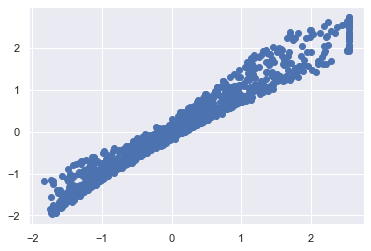

In [123]:
plt.scatter(y_test_scaled['AgentBonus'], y_pred)

In [124]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [125]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train_scaled,y_train_scaled)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 2.53058956e-02  2.81190647e-02  1.02565674e-02 -1.59755511e-03
   1.34034288e-02  7.75671605e-03  6.46969568e-03  1.04575034e+00
  -6.59220177e-03  1.65881546e-03  3.03547646e-03  7.38048112e-03
  -5.69859811e-04  2.38941345e-03 -4.63077628e-03 -1.01719208e-03
  -4.29601977e-03  8.93202384e-04  3.35178628e-03 -4.13263564e-03
  -1.60495025e-03 -1.27799575e-04 -4.57229263e-03 -5.47736583e-02
  -5.47322671e-02 -3.19523633e-02 -5.87508058e-05  2.36237901e-03
   8.39028887e-03  4.04653462e-03 -4.66476490e-03  7.22547318e-04
  -1.17091656e-02  6.85081729e-03  5.83409457e-03 -1.06259282e-02
   5.12299501e-01]]


In [126]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled,y_train_scaled)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.01794244  0.0173993   0.          0.          0.00140755  0.
  0.          0.89673415  0.          0.          0.         -0.
 -0.          0.         -0.         -0.          0.          0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.         -0.          0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
  0.34442818]


In [127]:
r_train_acc = ridge.score(X_train_scaled, y_train_scaled)
r_test_acc = ridge.score(X_test_scaled, y_test_scaled)

In [128]:
from sklearn import metrics

predicted_train = ridge.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
r_train_mae = metrics.mean_absolute_error(y_train_scaled, predicted_train)
predicted_test = ridge.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
r_test_mae = metrics.mean_absolute_error(y_test_scaled, predicted_test)

In [129]:
predicted_train = ridge.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
r_train_rmse = np.sqrt(metrics.mean_squared_error(y_train_scaled, predicted_train))
predicted_test = ridge.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
r_test_rmse = np.sqrt(metrics.mean_squared_error(y_test_scaled, predicted_test))

In [130]:
index=['Train Accuracy', 'Test Accuracy', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE']
data = pd.DataFrame({'Ridge Regression':[r_train_acc,r_test_acc,r_train_rmse,r_test_rmse,r_train_mae,r_test_mae]},index=index)
round(data,2)

,Ridge Regression
Train Accuracy,0.96
Test Accuracy,0.96
Train RMSE,0.19
Test RMSE,0.20
Train MAE,0.14
Test MAE,0.15


In [131]:
l_train_acc = lasso.score(X_train_scaled, y_train_scaled)
l_test_acc = lasso.score(X_test_scaled, y_test_scaled)

In [132]:
predicted_train = lasso.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
l_train_mae = metrics.mean_absolute_error(y_train_scaled, predicted_train)
predicted_test = lasso.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
l_test_mae = metrics.mean_absolute_error(y_test_scaled, predicted_test)

In [133]:
predicted_train = lasso.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
l_train_rmse = np.sqrt(metrics.mean_squared_error(y_train_scaled, predicted_train))
predicted_test = lasso.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
l_test_rmse = np.sqrt(metrics.mean_squared_error(y_test_scaled, predicted_test))

In [134]:
index=['Train Accuracy', 'Test Accuracy', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE']
data = pd.DataFrame({'Lasso Regression':[l_train_acc,l_test_acc,l_train_rmse,l_test_rmse,l_train_mae,l_test_mae]},index=index)
round(data,2)

,Lasso Regression
Train Accuracy,0.93
Test Accuracy,0.92
Train RMSE,0.27
Test RMSE,0.28
Train MAE,0.21
Test MAE,0.22


In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [136]:
i=0
for column in X.columns:
    if i < 38:
        if(vif[i] > 5):
            print (column ,"--->",  vif[i])
            i = i+1
        
        

Age ---> 5.120904029729623
CustTenure ---> 5.119676678994926
ExistingProdType ---> 68.696090488503
NumberOfPolicy ---> 7.810937004564266
MonthlyIncome ---> 73.85046719752414


In [137]:
## Building a Neural Network Classifier

from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()

In [138]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1)

In [139]:
mlp.fit(X_train_scaled, y_train_scaled)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPRegressor(random_state=1)

In [140]:
mlp.score(X_train_scaled, y_train_scaled)

0.9952057610167349

In [141]:
mlp.score(X_test_scaled, y_test_scaled)

0.9859915059309079

In [142]:
from sklearn import metrics

from sklearn.metrics import mean_squared_error

In [143]:
## training data

MLPrmse = mean_squared_error(y_train_scaled,(mlp.predict(X_train_scaled)),squared=False)
MLPrmse

0.06924044326306063

In [144]:
MLPrmse = mean_squared_error(y_test_scaled,(mlp.predict(X_test_scaled)),squared=False)
MLPrmse

0.11835748421241524

In [145]:
mae = mean_absolute_error(y_train_scaled,(mlp.predict(X_train_scaled)))
mae

0.05394488315479518

In [146]:
mae = mean_absolute_error(y_test_scaled,(mlp.predict(X_test_scaled)))
mae

0.08913609571059425

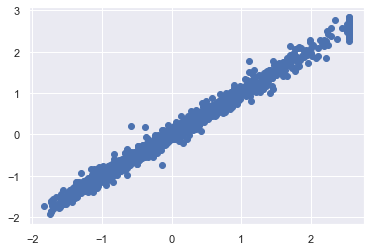

In [147]:
plt.scatter(y_test_scaled,(mlp.predict(X_test_scaled)))

In [148]:
## Tuning MLPRegressor

param_grid = {
    'hidden_layer_sizes': [100,50,20,10], 
    'max_iter': [2500,5000], 
    'solver': ['adam','sgd'], 
    'tol': [0.01], 
}

from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(
    mlp,
    param_grid,
    cv=5, verbose=0, n_jobs=-1)

In [149]:
grid_result = gsc.fit(X_train_scaled, y_train_scaled)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [150]:
best_params = grid_result.best_params_
best_params

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [151]:
best_mlp = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                        tol=best_params["tol"],
                        solver=best_params["solver"],
                        max_iter= 5000)

In [152]:
best_mlp.fit(X_train_scaled, y_train_scaled)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPRegressor(hidden_layer_sizes=100, max_iter=5000, tol=0.01)

In [153]:
best_mlp.score(X_train_scaled, y_train_scaled)

0.9809626805191756

In [154]:
best_mlp.score(X_test_scaled, y_test_scaled)

0.968321867015845

In [155]:
MLPrmse = mean_squared_error(y_train_scaled,(best_mlp.predict(X_train_scaled)),squared=False)
MLPrmse

0.13797579309728353

In [156]:
MLPrmse = mean_squared_error(y_test_scaled,(best_mlp.predict(X_test_scaled)),squared=False)
MLPrmse

0.17798351885541247

In [157]:
mae = mean_absolute_error(y_train_scaled,(best_mlp.predict(X_train_scaled)))
mae

mae = mean_absolute_error(y_test_scaled,(best_mlp.predict(X_test_scaled)))
mae

0.137795523356776

<Figure size 432x288 with 0 Axes>

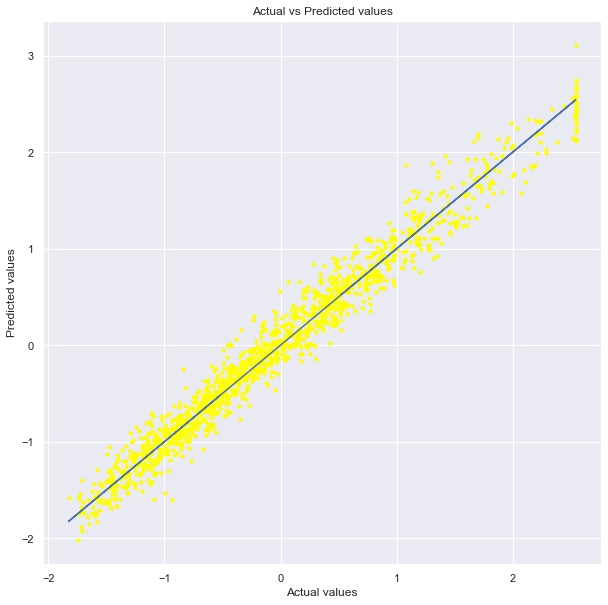

In [158]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(y_test_scaled, y_test_scaled)
plt.scatter(y_test_scaled, (best_mlp.predict(X_test_scaled)), s=10, c="yellow")
plt.title("Actual vs Predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [159]:
## Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dtR = DecisionTreeRegressor(random_state=0)

dtR.fit(X_train_scaled, y_train_scaled)

DecisionTreeRegressor(random_state=0)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


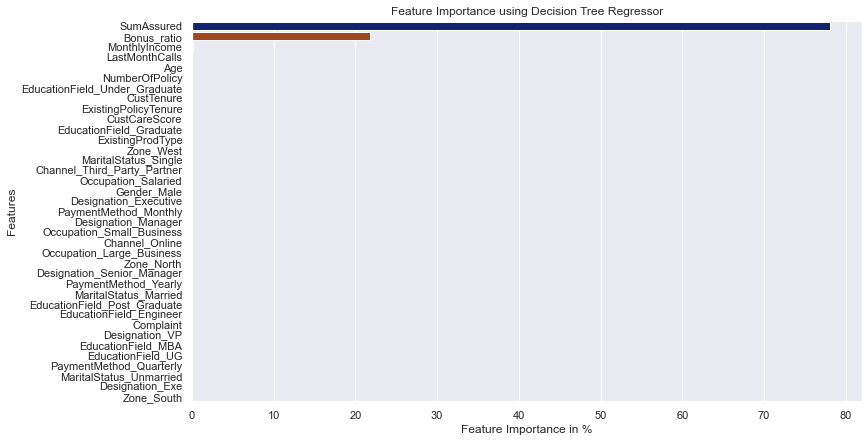

In [160]:
x=pd.DataFrame(dtR.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Decision Tree Regressor')
plt.show()

<Figure size 432x288 with 0 Axes>

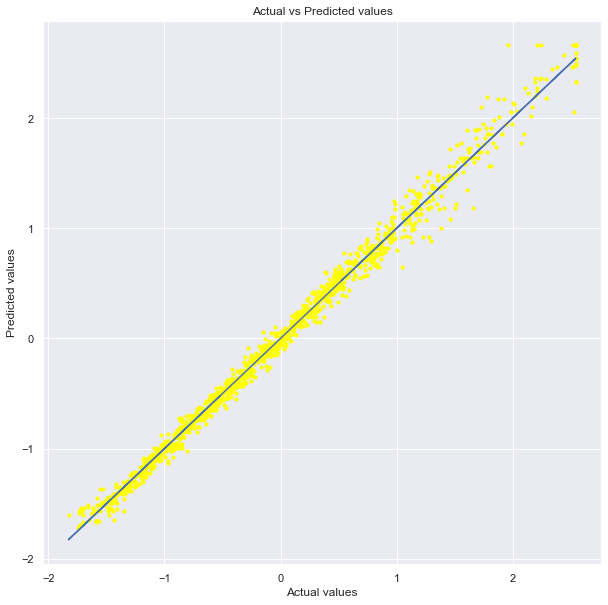

In [161]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(y_test_scaled, y_test_scaled)
plt.scatter(y_test_scaled, (dtR.predict(X_test_scaled)), s=10, c="yellow")
plt.title("Actual vs Predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [162]:
dtR.score(X_train_scaled, y_train_scaled)

1.0

In [163]:
dtR.score(X_test_scaled, y_test_scaled)

0.9921758493024103

In [164]:
dtRmse = mean_squared_error(y_train_scaled,(dtR.predict(X_train_scaled)),squared=False)
dtRmse

3.418634095802663e-18

In [165]:
dtRrmse = mean_squared_error(y_test_scaled,(dtR.predict(X_test_scaled)),squared=False)
dtRrmse

0.08845422939345357

In [166]:
mae = mean_absolute_error(y_train_scaled,(dtR.predict(X_train_scaled)))
mae

1.0526766984435744e-19

In [167]:
mae = mean_absolute_error(y_test_scaled,(dtR.predict(X_test_scaled)))
mae

0.06181451947848977

In [168]:
## Pruning Decision tree

param_grid = {
    
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [50,100,150,300,450],
}

dtcl = DecisionTreeRegressor(random_state=1)

In [169]:
grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [170]:
grid_search.fit(X_train_scaled, y_train_scaled)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


DecisionTreeRegressor(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                      random_state=1)

In [171]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Tree_File = open('tree4.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file=Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Tree_File.close()

In [172]:
best_grid.score(X_train_scaled, y_train_scaled)

0.9675233854544184

In [173]:
best_grid.score(X_test_scaled, y_test_scaled)

0.9611788921329564

In [174]:
dtRmse = mean_squared_error(y_train_scaled,(best_grid.predict(X_train_scaled)),squared=False)
dtRmse

0.18021269252075903

In [175]:
dtRrmse = mean_squared_error(y_test_scaled,(best_grid.predict(X_test_scaled)),squared=False)
dtRrmse

0.19703072823050638

In [176]:
mae = mean_absolute_error(y_train_scaled,(best_grid.predict(X_train_scaled)))
mae

0.13593640810265553

In [177]:
mae = mean_absolute_error(y_test_scaled,(best_grid.predict(X_test_scaled)))
mae

0.14979785884353072

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


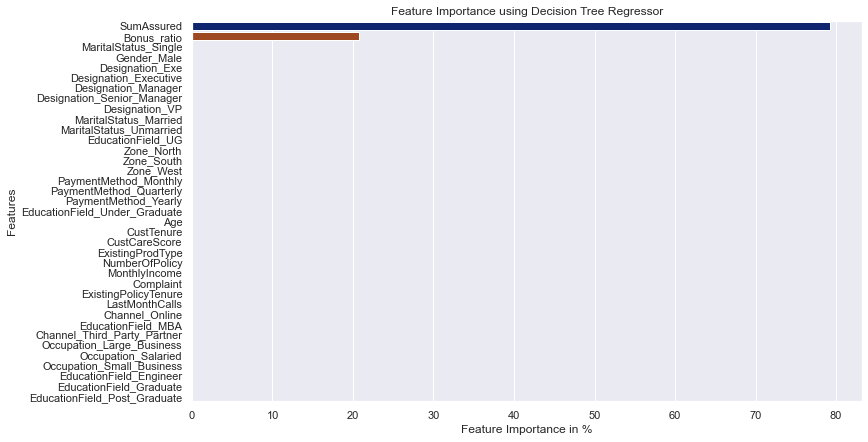

In [178]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Decision Tree Regressor')
plt.show()

<Figure size 432x288 with 0 Axes>

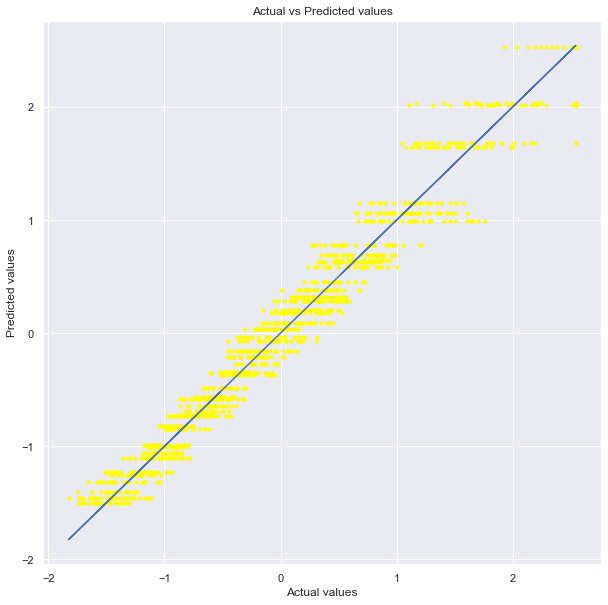

In [179]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(y_test_scaled, y_test_scaled)
plt.scatter(y_test_scaled, (best_grid.predict(X_test_scaled)), s=10, c="yellow")
plt.title("Actual vs Predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [180]:
## Random Forest Regressor



from sklearn.ensemble import RandomForestRegressor

In [181]:
rfR = RandomForestRegressor(random_state=0)

In [182]:
rfR.fit(X_train_scaled, y_train_scaled)

<ipython-input-182-2f6c3dbd4d79>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfR.fit(X_train_scaled, y_train_scaled)


RandomForestRegressor(random_state=0)

In [183]:
rfR.score(X_train_scaled, y_train_scaled)

0.999751123148193

In [184]:
rfR.score(X_test_scaled, y_test_scaled)

0.9973438131308289

In [185]:
rfRmse = mean_squared_error(y_train_scaled,(rfR.predict(X_train_scaled)),squared=False)
rfRmse

0.01577583125565568

In [186]:
rfRrmse = mean_squared_error(y_test_scaled,(rfR.predict(X_test_scaled)),squared=True)
rfRrmse

0.0026561868691711062

In [187]:
mae = mean_absolute_error(y_train_scaled,(rfR.predict(X_train_scaled)))
mae

0.00993979338295639

In [188]:
mae = mean_absolute_error(y_test_scaled,(rfR.predict(X_test_scaled)))
mae

0.03569432808005726

<Figure size 432x288 with 0 Axes>

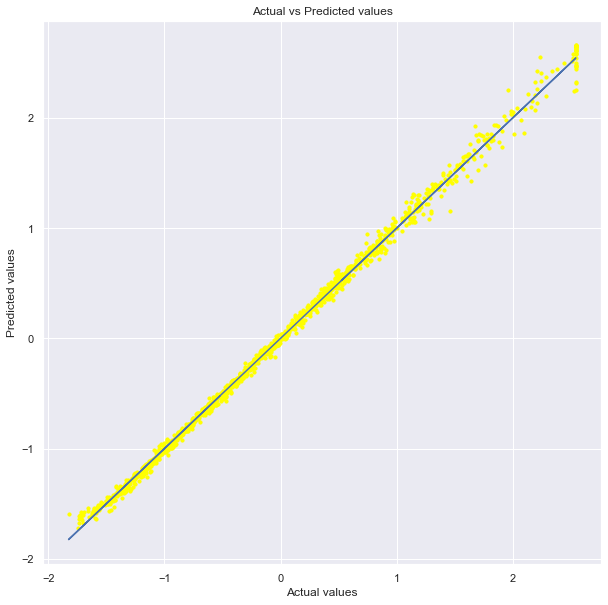

In [189]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(y_test_scaled, y_test_scaled)
plt.scatter(y_test_scaled, (rfR.predict(X_test_scaled)), s=10, c="yellow")
plt.title("Actual vs Predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


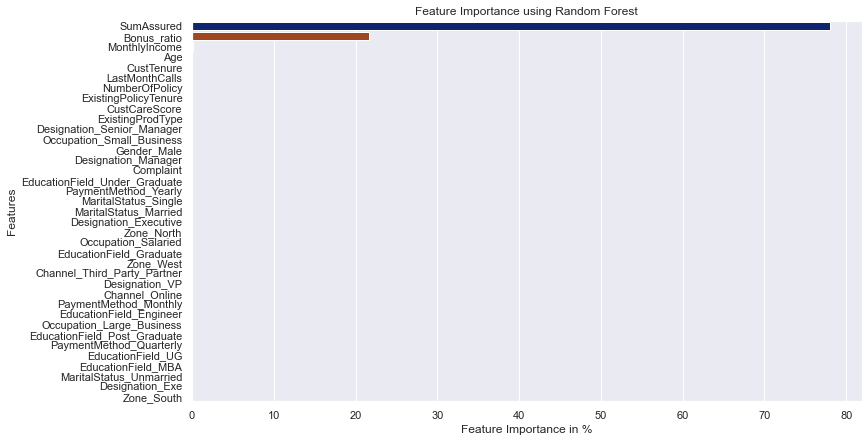

In [190]:
x=pd.DataFrame(rfR.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Random Forest')
plt.show()

In [191]:
## Tuning parameters

param_grid = {
    'max_depth': [10,20,30,40],
    'max_features': [6,7,8,9],
    'min_samples_leaf': [10,50,100],
    'min_samples_split': [50,60,70], 
    'n_estimators': [100,200,300]
}


rfcl = RandomForestRegressor(random_state=1)

In [192]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [193]:
grid_search.fit(X_train_scaled, y_train_scaled)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': [6, 7, 8, 9],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [50, 60, 70],
                         'n_estimators': [100, 200, 300]})

In [194]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [195]:
best_grid = grid_search.best_estimator_

best_grid

RandomForestRegressor(max_depth=20, max_features=9, min_samples_leaf=10,
                      min_samples_split=50, n_estimators=300, random_state=1)

In [196]:
best_grid.score(X_train_scaled, y_train_scaled)

0.9199931226387434

In [197]:
best_grid.score(X_test_scaled, y_test_scaled)

0.8973287070968042

In [198]:
rFRmse = mean_squared_error(y_train_scaled,(best_grid.predict(X_train_scaled)),squared=False)
rFRmse

0.28285486978529567

In [199]:
rFRmse = mean_squared_error(y_test_scaled,(best_grid.predict(X_test_scaled)),squared=False)
rFRmse

0.3204236147714393

In [200]:
mae = mean_absolute_error(y_train_scaled,(best_grid.predict(X_train_scaled)))
mae

0.215951992816807

In [201]:
mae = mean_absolute_error(y_test_scaled,(best_grid.predict(X_test_scaled)))
mae

0.24715070131243594

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


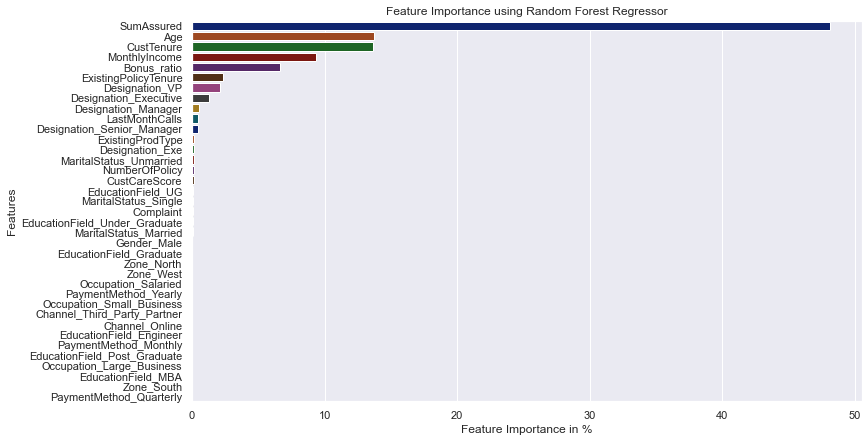

In [202]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Random Forest Regressor')
plt.show()

<Figure size 432x288 with 0 Axes>

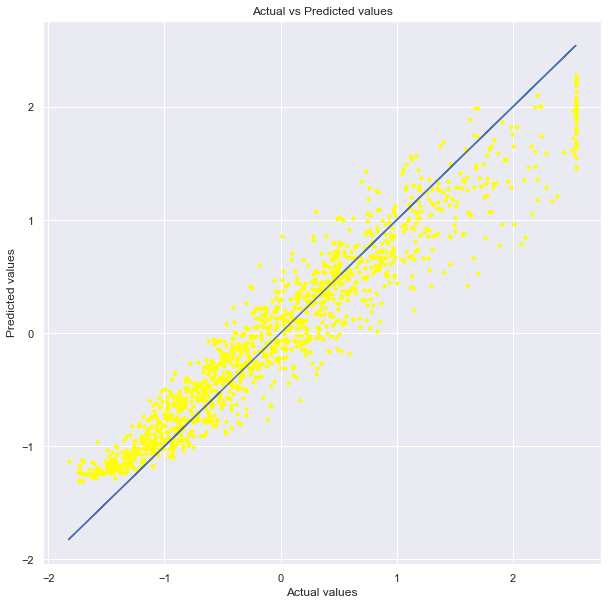

In [203]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(y_test_scaled, y_test_scaled)
plt.scatter(y_test_scaled, (best_grid.predict(X_test_scaled)), s=10, c="yellow")
plt.title("Actual vs Predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [204]:
from sklearn.ensemble import GradientBoostingRegressor

gbcl = GradientBoostingRegressor(random_state=1)
gbcl = gbcl.fit(X_train_scaled, y_train_scaled)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [205]:
y_train_predict = gbcl.predict(X_train_scaled)

In [206]:
gbcl.score(X_train_scaled, y_train_scaled)

0.9979735031127056

In [207]:
gbcl.score(X_test_scaled, y_test_scaled)

0.9960800282252108

In [208]:
gbRmse = mean_squared_error(y_train_scaled,(gbcl.predict(X_train_scaled)),squared=False)
gbRmse

0.04501662900856046

In [209]:
gbRmse = mean_squared_error(y_test_scaled,(gbcl.predict(X_test_scaled)),squared=False)
gbRmse

0.06260967796426642

In [210]:
mae = mean_absolute_error(y_train_scaled,(gbcl.predict(X_train_scaled)))
mae

0.033996219094859684

In [211]:
mae = mean_absolute_error(y_test_scaled,(gbcl.predict(X_test_scaled)))
mae

0.048298514489438955

<Figure size 432x288 with 0 Axes>

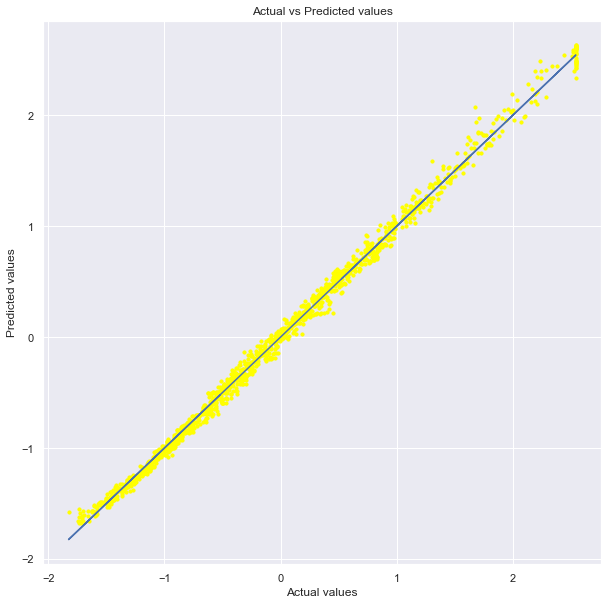

In [212]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(y_test_scaled, y_test_scaled)
plt.scatter(y_test_scaled, (gbcl.predict(X_test_scaled)), s=10, c="yellow")
plt.title("Actual vs Predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()